In [1]:
!rm df-*-checkpoint.csv

zsh:1: no matches found: df-*-checkpoint.csv


In [2]:
import os
import glob

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load all datasets

In [4]:
all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df = df.drop_duplicates()
print(df.shape)

(555, 18)


In [5]:
df['Orchestrator'] = df['Orchestrator'].astype('category')
df['Benchmark'] = df['Benchmark'].astype('category')
df['Exp'] = df['Exp'].astype('category')
# df['Latency'] = df['Latency'].round(2)

In [6]:
df_0 = df.loc[df['Exp'] == 'exp0']
df_1 = df.loc[df['Exp'] == 'exp1']
df_2 = df.loc[df['Exp'] == 'exp2']
df_3 = df.loc[df['Exp'] == 'exp3']
df_4 = df.loc[df['Exp'] == 'exp4']
df_5 = df.loc[df['Exp'] == 'exp5']
df_6 = df.loc[df['Exp'] == 'exp6']
df_7 = df.loc[df['Exp'] == 'exp7']
df_8 = df.loc[df['Exp'] == 'exp8']
df_9 = df.loc[df['Exp'] == 'exp9']
df_10 = df.loc[df['Exp'] == 'exp10']
df_11 = df.loc[df['Exp'] == 'exp11']

In [7]:
# Global settings
fontsize = 20
legend_location = "lower right"

# Exp2

In [8]:
df_2.iloc[:,[0,1,2,5,6,10,11,12,-1]].head()

,Latency,Requests,Throughput,Benchmark,Infinite,Vertical,Threads,Connections,ReqSec
0,9.57,200.0,5614.0,hr,1,1,16,1024,186.73
1,4.93,200.0,5728.0,mm,1,1,16,512,190.71
2,4.89,200.0,5853.0,mm,1,1,4,1024,194.65
3,7.61,200.0,5958.0,sn,1,1,8,512,198.22
4,4.74,200.0,5860.0,mm,1,1,4,512,195.14


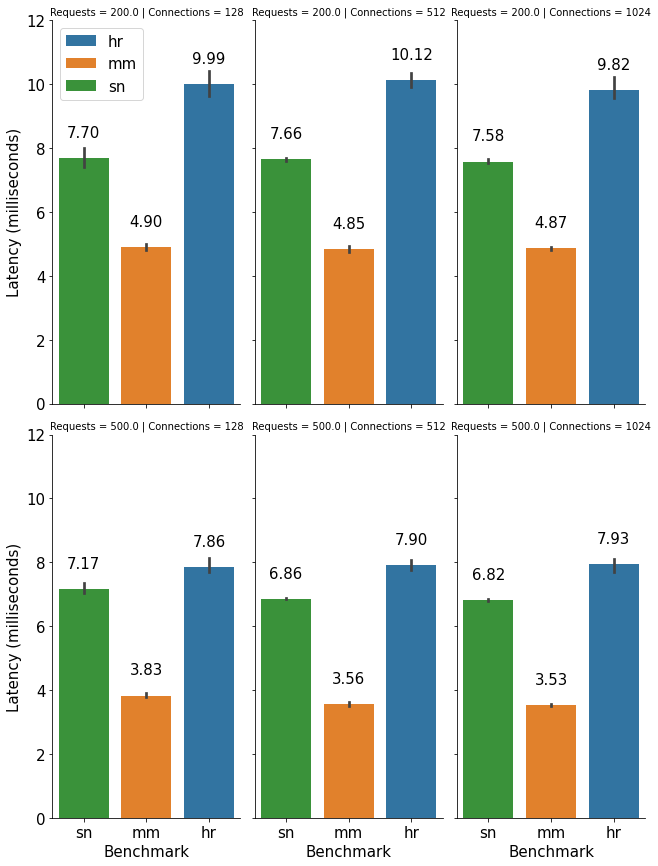

In [13]:
# sns.set(font_scale=1)
# sns.set_style("white")

fontsize = 15
g = sns.FacetGrid(df_2, col="Connections", row="Requests", hue="Benchmark", height=6, aspect=.5)
g.map(sns.barplot, "Benchmark", "Latency", order=["sn", "mm", "hr"])
for axes in g.axes:
    for ax in axes:
        for i in ax.containers:
            ax.bar_label(i, label_type='edge', padding=18, fmt='%.2f',fontsize=fontsize)
            yticks = [int(tick) for tick in ax.get_yticks()]

g.set_ylabels("Latency (milliseconds)",fontsize=15)
g.set_xlabels(fontsize=fontsize)

g.set_xticklabels(fontsize=fontsize)
g.set_yticklabels(yticks, fontsize=fontsize)
g.axes[0][0].legend(fontsize=15)

# g.add_legend(fontsize=18, title="Benchmarks")
g.savefig("Figures/exp2-connections.png", bbox_inches='tight')

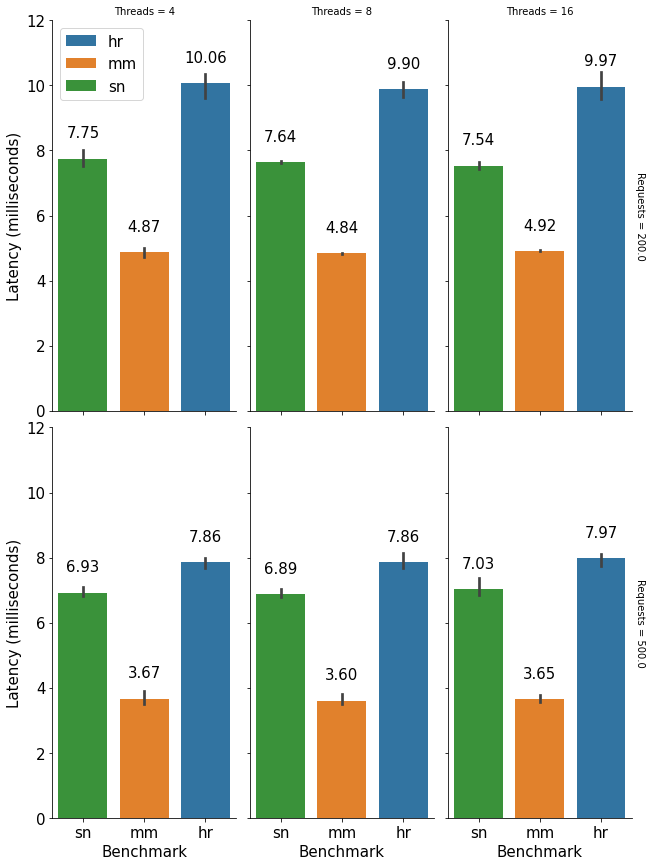

In [14]:
# sns.set(font_scale=1)
# sns.set_style("white")

fontsize = 15
g = sns.FacetGrid(df_2, col="Threads", row="Requests", hue="Benchmark", margin_titles=True,height=6, aspect=.5, )
g.map(sns.barplot, "Benchmark", "Latency", order=["sn", "mm", "hr"])
for axes in g.axes:
    for ax in axes:
        for i in ax.containers:
            ax.bar_label(i, label_type='edge', padding=18, fmt='%.2f',fontsize=fontsize)
            yticks = [int(tick) for tick in ax.get_yticks()]

g.set_ylabels("Latency (milliseconds)",fontsize=15)
g.set_xlabels(fontsize=fontsize)

g.set_xticklabels(fontsize=fontsize)
g.set_yticklabels(yticks, fontsize=fontsize)
g.axes[0][0].legend(fontsize=15)

g.savefig("Figures/exp2-threads.png", bbox_inches='tight')
# g.add_legend(fontsize=18, title="Benchmarks")g.savefig("Figures/exp2-threads.png", bbox_inches='tight')